In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

import warnings
warnings.filterwarnings("ignore")

파일 불러오기

In [41]:
df = pd.read_csv('son1.csv',encoding='utf-8')
print(len(df))
df.head(3)

1000


,Unnamed: 0,created,tweet_text
0,0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
1,1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...
2,2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...


데이터 정규화

In [42]:
import re

# 정규표현식 - 한글만 포함
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힝]+') # 한글만 포함시킴
    result = hangul.sub('',text)
    return result

In [43]:
# 한글만 포함해서 컬럼 저장
df['ko_text'] =  df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head(2)

,Unnamed: 0,created,tweet_text,ko_text
0,0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
1,1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...


Konlpy를 이용한 키워드 분할

In [44]:
from konlpy.tag import Okt
# 글자가 몇번 나왔는지 확인, 카운트 함수
from collections import Counter

#  불용어사전을 이용해서 필요없는 단어 제거
with open('korean_stopwords.txt',encoding='utf-8') as f:
    stopwords = f.readlines()
# list타입
stopwords = [x.strip() for x in stopwords]    

In [45]:
stopwords[:3]

['가', '가까스로', '가령']

In [46]:
# 형태소 분석, 한글자 삭제, 불용어 제거
def get_nouns(x):
    # 키워드연관분석을 하려면 명사만 필요
    # list타입
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    # 한글자 키워드는 모두제거
    nouns = [noun for noun in nouns if len(noun)>1 ]
    # 불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords ]
    return nouns

In [53]:
df['nouns'] = df['ko_text'].apply(lambda x : get_nouns(x))
df.head(3)

,Unnamed: 0,created,tweet_text,ko_text,nouns
0,0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,"[가슴, 경주, 대구, 마사, 마산, 부산, 소통, 야동, 인천, 최신영, 손흥민,..."
1,1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...,"[코인, 세탁소, 산업혁명, 셀프, 사이트, 인공, 지능, 빨래, 손흥민, 그래핀,..."
2,2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...,팬문선답 타래 손흥민,"[문선, 타래, 손흥민]"


## 키워드 연관검색

샘플을 가지고 실습

In [48]:
# 샘플
transactions = [
    ['손흥민','시소코'],
    ['손흥민','케인'],
    ['손흥민','케인','콘테'],
]

# 연관분석 모델 적용
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'콘테'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'콘테'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '시소코'}), confidence=0.3333333333333333, lift=1.0), Ordere

In [49]:
result2 = list(apriori(transactions,
                       min_support=0.5,    # 지지도
                       min_confidence=0.6, # 신뢰도
                       min_lift=1.0,       # 향상도
                       max_length=2        # 크기2이하
                       ))
result2

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'케인', '손흥민'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인', '손흥민'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

In [50]:
columns = ['source','target','support','confidence','lift']
network_df = pd.DataFrame(columns=columns)

for result in results:
    # 키워드가 2개 이상일때
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0],items[1],result.support,result.ordered_statistics[1][2],result.ordered_statistics[1][3]]
        series = pd.Series(row,index=network_df.columns)
        network_df = network_df.append(series,ignore_index=True)

network_df.head()    

,source,target,support,confidence,lift
0,손흥민,시소코,0.333333,0.333333,1.0
1,케인,손흥민,0.666667,0.666667,1.0
2,손흥민,콘테,0.333333,0.333333,1.0
3,케인,콘테,0.333333,0.5,1.5


키워드 연관검색 추출

In [51]:
searchword = network_df[network_df['source']=='케인']
searchword.sort_values(by='support',ascending=False)

,source,target,support,confidence,lift
1,케인,손흥민,0.666667,0.666667,1.0
3,케인,콘테,0.333333,0.5,1.5


실제 데이터를 가지고 키워드 연관검색 추출

In [59]:
# 데이터 추출
transactions2 = df['nouns'].tolist()
# df['nouns']에서 Nan데이터가 존재하는 것만 저장
transactions2 = [tran1 for tran1 in transactions2 if tran1]
len(transactions2) #1000개 데이터에서 6개 삭제됨.

994

In [61]:
# 연관분석 모델 실행
real_result = list(apriori(transactions2,
                       min_support=0.05,    # 지지도
                       min_confidence=0.1, # 신뢰도
                       min_lift=5,       # 향상도
                       max_length=2        # 크기2이하
                       ))
real_result

[RelationRecord(items=frozenset({'국가', '국가대표팀'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=14.617647058823529), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'국가'}), confidence=0.9852941176470588, lift=14.617647058823529)]),
 RelationRecord(items=frozenset({'국가', '김신욱'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'김신욱'}), confidence=1.0, lift=7.705426356589148), OrderedStatistic(items_base=frozenset({'김신욱'}), items_add=frozenset({'국가'}), confidence=0.5193798449612403, lift=7.705426356589148)]),
 RelationRecord(items=frozenset({'국가', '대한민국'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'대한민국'}), confidence=1.0, lift=13.432432432432432), OrderedStatistic(items_base=frozenset({'대한민국'}), items_add=frozenset({'국가'

In [64]:
# 키워드 연관분석 출력
columns = ['source','target','support','confidence','lift']
network_df = pd.DataFrame(columns=columns)

for result in real_result:
    # 키워드가 2개 이상일때
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0],items[1],result.support,result.ordered_statistics[1][2],result.ordered_statistics[1][3]]
        series = pd.Series(row,index=network_df.columns)
        network_df = network_df.append(series,ignore_index=True)

network_df.head() 

,source,target,support,confidence,lift
0,국가,국가대표팀,0.067404,0.985294,14.617647
1,국가,김신욱,0.067404,0.51938,7.705426
2,국가,대한민국,0.067404,0.905405,13.432432
3,국가,동시,0.067404,0.985294,14.617647
4,국가,문선,0.067404,0.603604,8.954955


In [70]:
# 키워드 검색 추출
searchword = network_df[network_df['source']=='배우']
searchword.sort_values(by='support',ascending=False)

,source,target,support,confidence,lift
54,배우,소리,0.078471,0.95122,12.121951
56,배우,차지연,0.078471,1.0,12.74359


전체 데이터를 가지고 네트워크 시각화

말뭉치 추출

In [71]:
tweet_corpus = ''.join(df['ko_text'].tolist())
tweet_corpus

'가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁소 암 브레이커 사람인 시 심장 강대국 블로그 사물인터넷 당뇨 지식인 스트레스 빅데이터     팬문선답 타래 손흥민 가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  함평축구선수 장짐최신영화 증거손흥민 갈천축구 남양읍야설 도이신던스타킹 장성패티쉬 영광마사지 진도야사 동오아줌마 연남동야동 포항발정난아줌마서울부산대구인천 완도동영상 남양소통 신안케이 서울야노  가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  카테고리아프리메라 브라질축구 콜롬비아리그 라에키다드 축구선수 브라간치누 플라멩구 콜롬비아축구 스포츠토토 라이브스코어 브라질리그 해외축구프미리어리그 브라질세리에 토트넘 골오오 손흥민  옥션 번개장터 시리즈 토토 기아 그래핀 빅데이터 브레이커강대국 아프리카티비 사다리 심장 모하비 스트레스 당뇨 사물인터넷 이승기 사람인 싼타페 강남구 손흥민 암 파워볼     트레이닝세션 손흥민 원주토토 단성모하비 양평아프리카티비 강릉손흥민 가평싼타페 상원곡기아 연천시리즈 동해강남구외중방브레이커 북하사다리 북상옥션 서초이승기 춘천번개장터 하방사람인 하원곡시리즈 중방파워볼  가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무    여름에 손흥민 민소매 개짱이다 어깨뼈까지 존잘임    트레이닝세션 손흥민    스리랑카전 경기 후 인사 손흥민 마이크 켜진줄 모르고 말하는거 ㄱㅇㅇ      여름에 손흥민 민소매 

In [74]:
# 전체 형태소 분석 - 명사추출
# list타입
all_nouns = Okt().nouns(tweet_corpus)
# 키워드 노출 개수
count = Counter(all_nouns)
# 한글자 키워드 모두 삭제
remove_char_counter = Counter({x:count[x] for x in count if len(x)> 1})
remove_char_counter

Counter({'가슴': 44,
         '경주': 43,
         '대구': 43,
         '마사': 40,
         '마산': 43,
         '부산': 75,
         '소통': 72,
         '야동': 70,
         '인천': 49,
         '최신영': 70,
         '손흥민': 1145,
         '만남': 86,
         '소개팅': 43,
         '패티': 70,
         '어플': 43,
         '스타킹': 115,
         '축구': 456,
         '축구선수': 88,
         '울산': 51,
         '아줌마': 97,
         '마사지': 70,
         '동영상': 70,
         '애무': 43,
         '코인': 5,
         '세탁소': 10,
         '산업혁명': 6,
         '셀프': 6,
         '사이트': 4,
         '인공': 7,
         '지능': 7,
         '빨래': 6,
         '그래핀': 17,
         '지도': 36,
         '강남구': 20,
         '광고': 9,
         '브레이커': 21,
         '사람인': 26,
         '심장': 17,
         '강대국': 19,
         '블로그': 4,
         '사물인터넷': 15,
         '당뇨': 17,
         '지식인': 4,
         '스트레스': 16,
         '빅데이터': 17,
         '문선': 111,
         '타래': 37,
         '함평': 26,
         '장짐': 26,
         '증거': 26,
         '남양': 52,
        

In [77]:
# counter를 df로 타입변경
node_df = pd.DataFrame(remove_char_counter.items(),columns=['node','nodesize'])
# 노출횟수가 50미만 삭제
node_df = node_df[node_df['nodesize']>50]
node_df.head()

,node,nodesize
5,부산,75
6,소통,72
7,야동,70
9,최신영,70
10,손흥민,1145


연관 키워드 네트워크 시각화

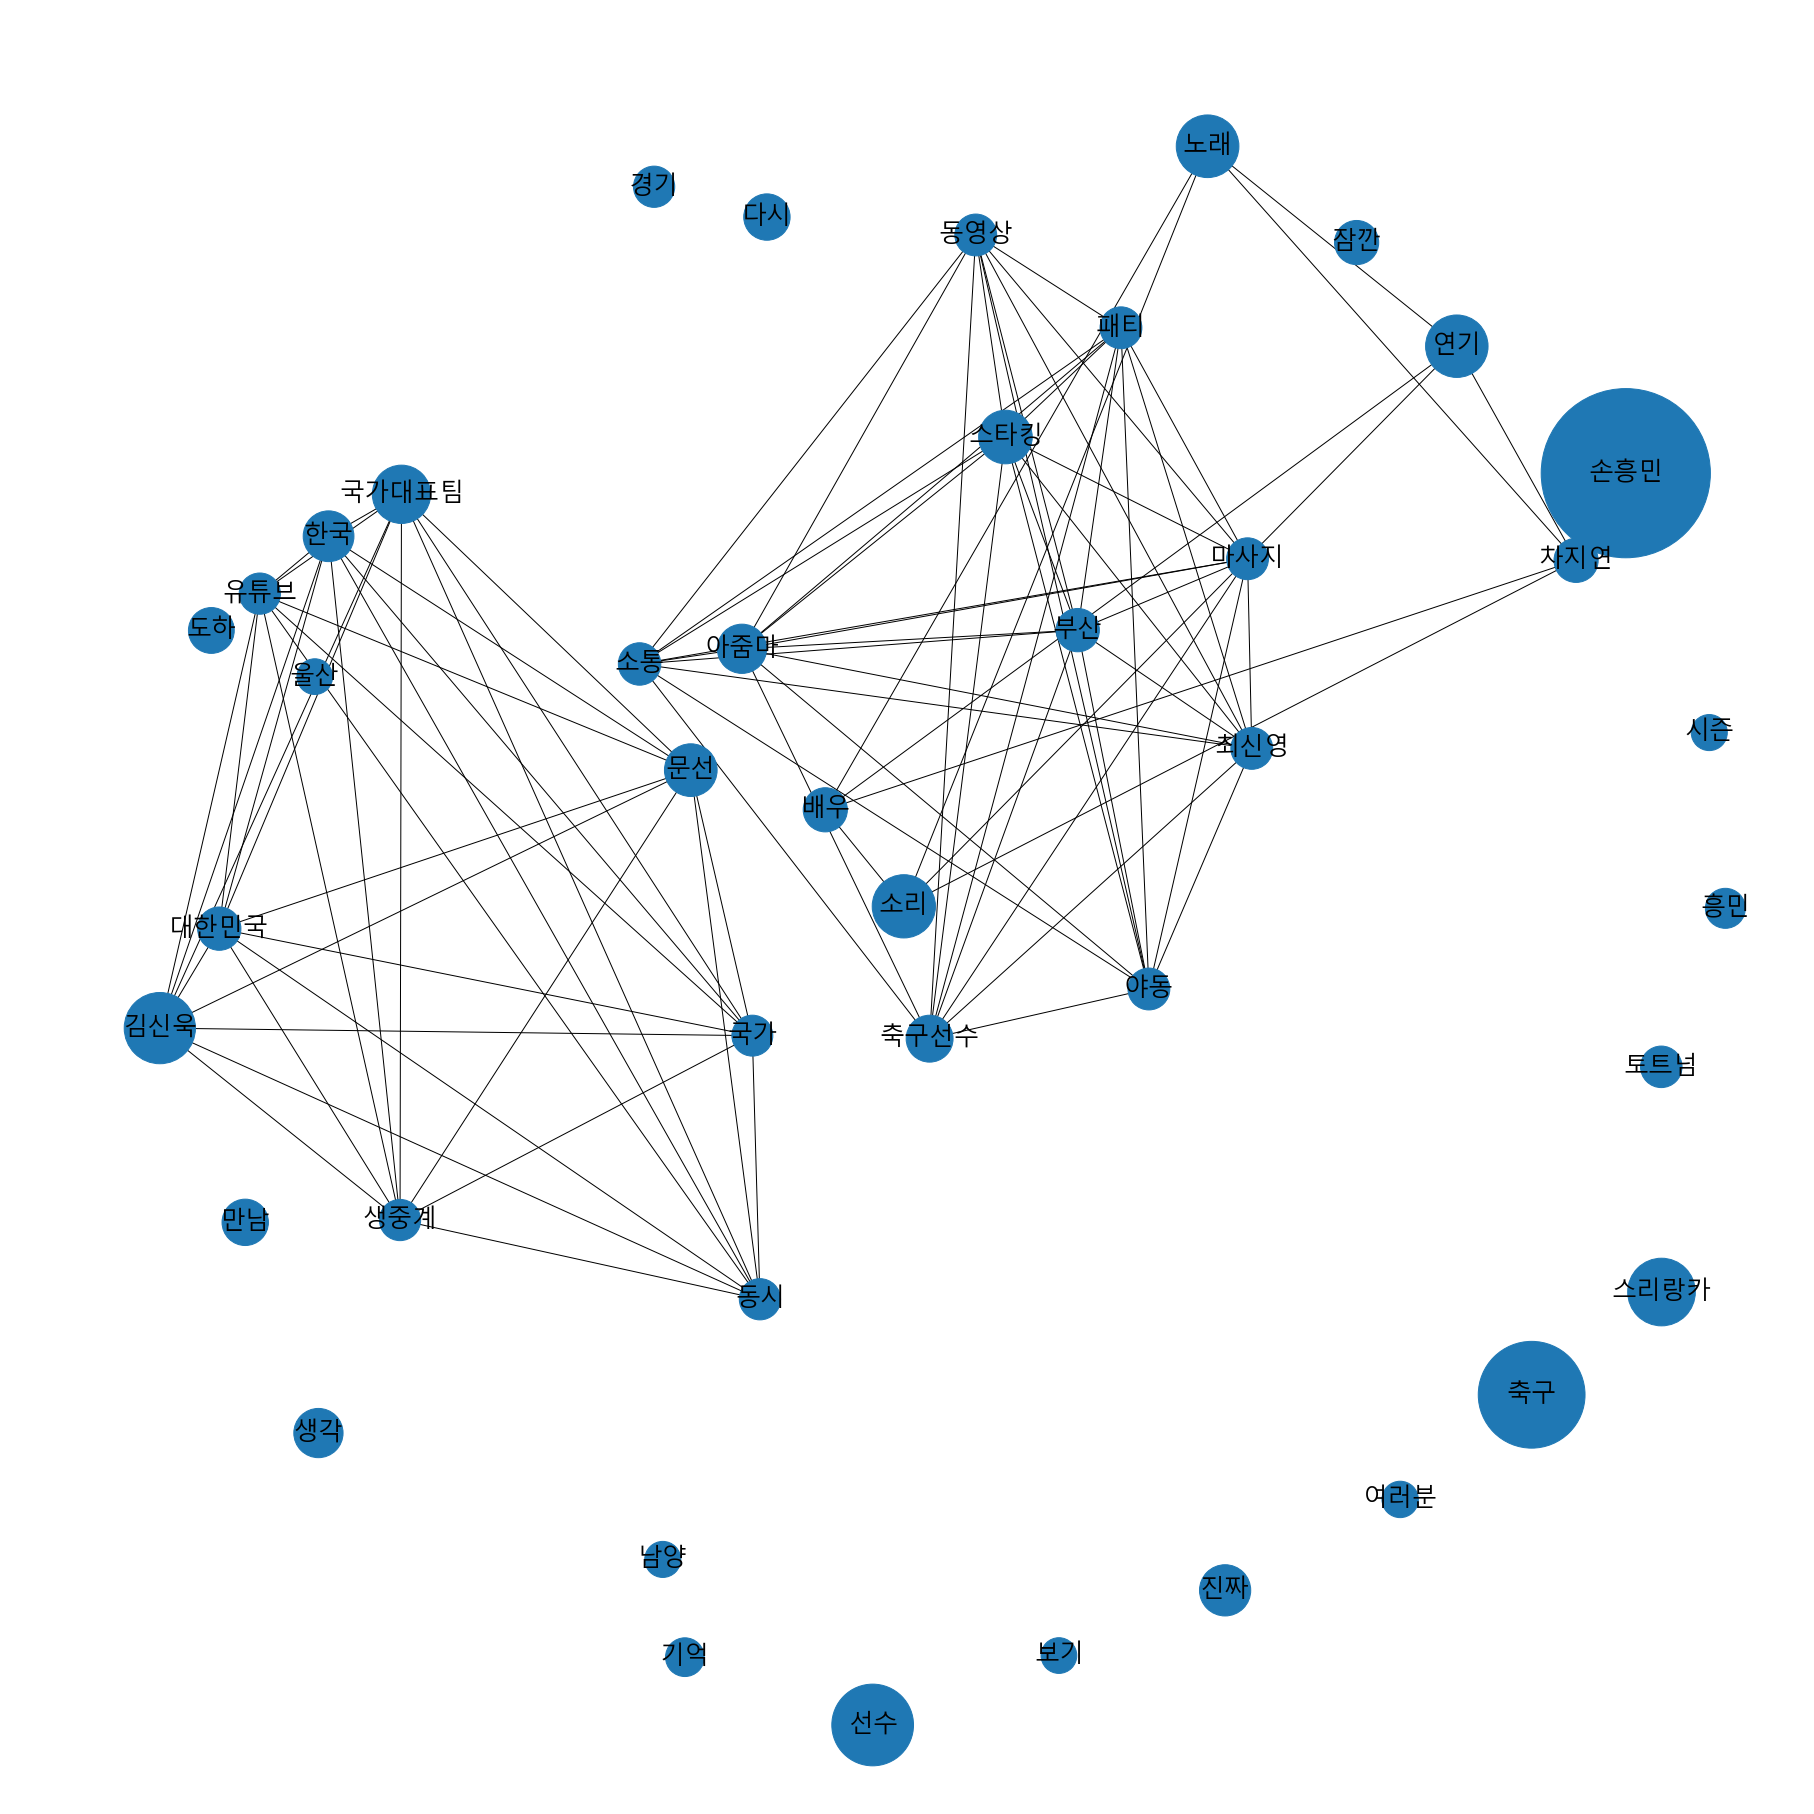

In [78]:
# pip install networkx 설치
import networkx as nx
plt.figure(figsize=(25,25))
# networkx 그래프 객체 생성
G = nx.Graph()
# 'node','nodesize'
# 빈도수를 가지고 네트워크 그래프 각각의 노드 원을 생성
for index,row in node_df.iterrows():
    G.add_node(row['node'],nodesize=row['nodesize'])
    
# 각각의 노드 연결 선 생성
# source,target,support,confidence,lift
for index,row in network_df.iterrows():
    G.add_weighted_edges_from([ (row['source'],row['target'],row['support']) ])
    
# 그래프 디자인과 관련된 파라미터 설정
pos = nx.spring_layout(G,k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G,pos=pos,node_size=sizes)

# 한글처리 - AppleGothic
nx.draw_networkx_labels(G,pos=pos,font_family='Malgun Gothic',font_size=25)

# 그래프 출력
ax = plt.gca()
plt.show()    
    
        